<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/Combined_code_for_the_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-13-2af12d63c429>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


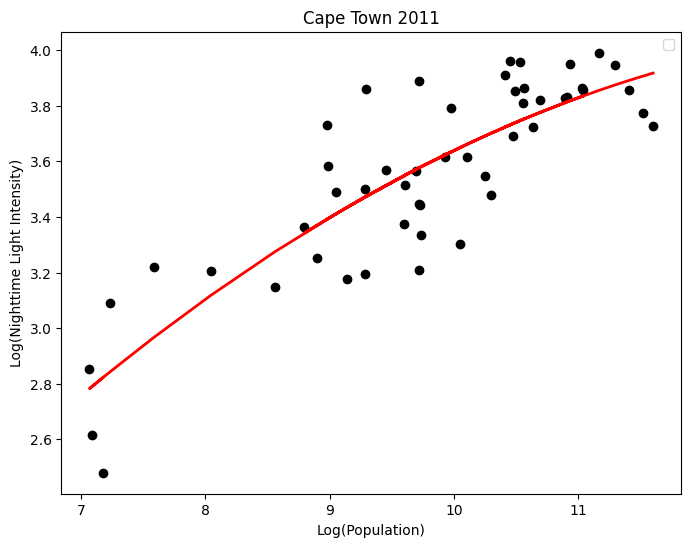

Root Mean Square Error: 0.18
Correlation Coefficient: 0.84
R² Score: 0.73
Standard Deviation: 0.35
P-Value: 0.00000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from scipy import stats

# Data from user
population = np.array([
    237414, 67491, 56234, 112507, 56114, 106222, 92330, 44842, 1563, 11916,
    5595, 36043, 152030, 39237, 42479, 50, 11890, 12369, 50285, 16776,
    82199, 98468, 4, 17900, 15538, 391749, 2294, 16911, 154615, 46686,
    52401, 33225, 9048, 77121, 11586, 95630, 310485, 36857, 60528, 31980,
    57996, 119462, 1681, 570, 200603, 116, 1075, 6569, 4, 55166
])
nighttime_light = np.array([
    63, 14, 63, 63, 62, 63, 62, 62, 6, 63,
    6, 63, 63, 63, 63, 63, 31, 6, 63, 36,
    53, 63, 12, 21, 21, 48, 6, 31, 63, 63,
    63, 52, 52, 63, 16, 63, 63, 39, 62, 31,
    63, 63, 4, 6, 63, 54, 63, 6, 6, 12
])

# Log transform population and nighttime light
df_population = np.log1p(population)
df_nighttime_light = np.log1p(nighttime_light)

# Apply optimized Gaussian smoothing
df_population_smooth = gaussian_filter1d(df_population, sigma=2)
df_nighttime_light_smooth = gaussian_filter1d(df_nighttime_light, sigma=2)

# Reshape data for sklearn
X = df_population_smooth.reshape(-1, 1)
y = df_nighttime_light_smooth.reshape(-1, 1)

# Use polynomial regression (degree 2 for better fit)
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(df_population_smooth, df_nighttime_light_smooth, color='black', alpha=1 )
plt.plot(df_population_smooth, y_pred, color='red', linewidth=2, )
plt.xlabel("Log(Population)")
plt.ylabel("Log(Nighttime Light Intensity)")
plt.title("Cape Town 2011")
plt.legend()
plt.show()

# RMS calculation
rms = np.sqrt(mean_squared_error(y, y_pred))

# Correlation coefficient
correlation = np.corrcoef(df_population_smooth, df_nighttime_light_smooth)[0, 1]

# Standard deviation
std_dev = np.std(df_nighttime_light_smooth)

# P-value calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(df_population_smooth, df_nighttime_light_smooth)

# R-squared value
r2 = r2_score(y, y_pred)

# Print results
print(f"Root Mean Square Error: {rms:.2f}")
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"P-Value: {p_value:.5f}")

<ipython-input-16-4f210469192d>:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


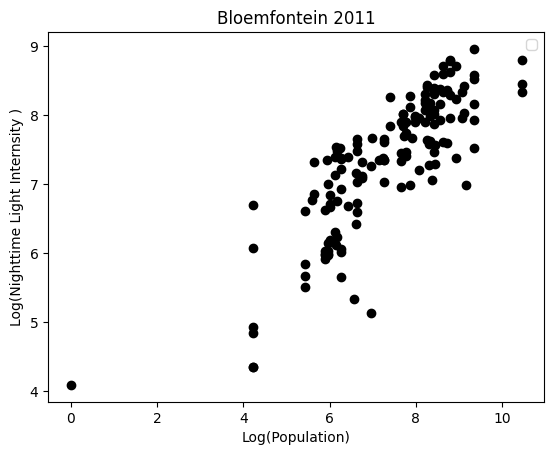

Correlation Coefficient (r): 0.8334605971714016
P-value for Correlation: 3.230184967803563e-40
Standard Deviation of Residuals: 0.5215078874369353
RMSE: 0.5215078874369352
R²: 0.7203489705883475


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
from sklearn.pipeline import make_pipeline

# Your data
population_2011 = np.array([
    266, 11478, 763, 4491, 763, 384, 7578, 481, 3644, 6594, 5249, 377, 4075, 529, 5606,
    1067, 4644, 517, 4576, 8783, 2198, 1633, 2627, 34601, 458, 360, 67, 9605, 526, 2596,
    282, 2121, 2923, 11368, 280, 3177, 854, 2375, 2128, 717, 0, 1042, 407, 6129, 2263,
    1268, 1435, 521, 1393, 4313, 9076, 466, 2738, 4117, 3896, 615, 226, 226, 226, 226,
    11478, 11478, 11478, 763, 763, 7578, 7578, 5606, 5606, 5606, 2121, 2121, 854, 854,
    2375, 2375, 2375, 3644, 3644, 3644, 3644, 5249, 5249, 1435, 1435, 1435, 1435, 4491,
    4491, 4491, 4491, 4491, 736, 763, 763, 736, 384, 384, 384, 384, 481, 481, 4644, 1042,
    615, 8783, 2627, 2923, 2923, 2198, 2198, 6129, 6129, 1633, 9076, 3896, 3896, 4576,
    11368, 3177, 521, 4313, 466, 67, 67, 67, 67, 529, 529, 529, 67, 34601, 34601, 458,
    458, 360, 360, 360, 360, 4075, 4075, 4117, 4117, 407, 407, 407, 407, 6594, 6594,
    6594, 6594
])

ntl_2011 = np.array([
    63, 63, 63, 3, 3, 63, 63, 63, 52, 61, 63, 63, 63, 3, 63, 63, 63, 63, 3, 62,
    54, 5, 62, 3, 3, 63, 55, 63, 3, 6, 6, 63, 62, 3, 63, 3, 63, 63, 3, 63, 63, 63,
    62, 54, 6, 6, 63, 3, 6, 3, 5, 3, 63, 63, 5, 63, 63, 63, 62, 63, 63, 63, 63, 62,
    63, 63, 58, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 43, 51, 58, 52, 63, 63, 63,
    63, 63, 63, 6, 10, 44, 36, 13, 3, 13, 16, 59, 63, 63, 63, 63, 63, 63, 63, 63,
    62, 62, 62, 62, 62, 62, 50, 62, 45, 25, 24, 3, 30, 49, 63, 32, 37, 15, 42, 51,
    56, 58, 62, 51, 52, 22, 10, 56, 49, 28, 7, 63, 63, 63, 63, 60, 61, 63, 63, 63,
    62, 62, 63, 62, 57, 61, 60
])

# 1. Log Transformation
log_population = np.log(population_2011 + 1)
log_ntl = np.log(ntl_2011 + 1)

# 2. Smoothing with Gaussian Filter
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Polynomial Regression (Degree 3)
polynomial_features = PolynomialFeatures(degree=3)
model = make_pipeline(polynomial_features, LinearRegression())

# Fit model to smoothed NTL and log-transformed population
model.fit(log_population.reshape(-1, 1), smoothed_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 5. Standard Deviation of Residuals
residuals = smoothed_ntl - predicted_ntl
std_dev_residuals = np.std(residuals)

# Visualize the results
plt.scatter(log_population, smoothed_ntl, color='black', )

# plt.plot(log_population, predicted_ntl, color='red', label='Polynomial Regression')
plt.title('Bloemfontein 2011')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Nighttime Light Internsity )')
plt.legend()
plt.show()

# Print Evaluation Metrics
print(f"Correlation Coefficient (r): {corr}")
print(f"P-value for Correlation: {p_value_corr}")
print(f"Standard Deviation of Residuals: {std_dev_residuals}")
print(f"RMSE: {np.sqrt(mean_squared_error(smoothed_ntl, predicted_ntl))}")
print(f"R²: {r2_score(smoothed_ntl, predicted_ntl)}")


<ipython-input-18-ee0272c524b6>:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


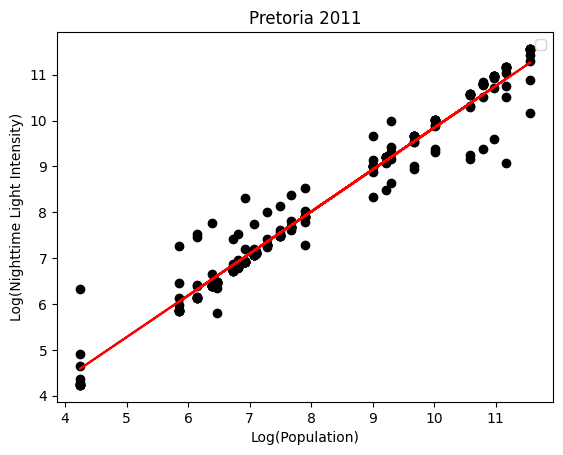

Correlation Coefficient (r): 0.9789289240971495
P-value for Correlation: 3.283050405389795e-166
Regression Intercept: 0.9058697890480412
Regression Coefficients: [ 0.00000000e+00  8.28362073e-01  1.13098769e-02 -4.69924147e-04]
Standard Deviation of Residuals: 0.37015922917587146
RMSE: 0.37015922917587146
R²: 0.9583067273618207


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr

# Data
population_2011 = np.array([1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015,
                           105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208,
                           10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964,
                           1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167,
                           1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222,
                           1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
                           15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760,
                           1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788,
                           2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157,
                           22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434,
                           2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702,
                           347, 347, 347, 347, 347, 347, 347, 347, 347, 347,
                           39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201,
                           462, 462, 462, 462, 462, 462, 462, 462, 462, 462,
                           48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493,
                           58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431,
                           594, 594, 594, 594, 594, 594, 594, 594, 594, 594,
                           646, 646, 646, 646, 646, 646, 646, 646, 646, 646,
                           69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
                           70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863,
                           8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166,
                           837, 837, 837, 837, 837, 837, 837, 837, 837, 837,
                           912, 912, 912, 912, 912, 912, 912, 912, 912, 912,
                           9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972])

ntl_2011 = np.array([8, 8, 5, 5, 10, 10, 7, 7, 10, 10,
                     53, 53, 62, 62, 62, 62, 62, 62, 57, 57,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     49, 49, 60, 60, 47, 47, 58, 58, 62, 62,
                     57, 57, 63, 63, 51, 51, 52, 52, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 58, 58,
                     15, 15, 6, 6, 7, 7, 7, 7, 6, 6,
                     62, 62, 63, 63, 63, 63, 63, 63, 63, 63,
                     43, 43, 11, 11, 41, 41, 27, 27, 16, 16,
                     61, 61, 58, 58, 63, 63, 63, 63, 60, 60,
                     7, 7, 59, 59, 5, 5, 10, 10, 59, 59,
                     60, 60, 60, 60, 63, 63, 58, 58, 41, 41,
                     62, 62, 60, 60, 63, 63, 63, 63, 58, 58,
                     62, 62, 63, 63, 62, 62, 63, 63, 61, 61,
                     63, 63, 63, 63, 61, 61, 63, 63, 63, 63,
                     3, 3, 4, 4, 4, 4, 7, 7, 4, 4,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     61, 61, 61, 61, 63, 63, 63, 63, 62, 62,
                     62, 62, 62, 62, 62, 62, 63, 63, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     60, 60, 56, 56, 60, 60, 56, 56, 59, 59,
                     63, 63, 63, 63, 62, 62, 63, 63, 63, 63,
                     34, 34, 33, 33, 30, 30, 63, 63, 25, 25,
                     12, 12, 50, 50, 17, 17, 13, 13, 36, 36,
                     ])

# 1. Log Transformation
log_population = np.log(population_2011)
log_ntl = np.log(ntl_2011)

# 2. Smoothing with Gaussian Filter
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Polynomial Regression (Degree 3)
polynomial_features = PolynomialFeatures(degree=3)
model = make_pipeline(polynomial_features, LinearRegression())

# Fit model to smoothed NTL and log-transformed population
model.fit(log_population.reshape(-1, 1), smoothed_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, _ = pearsonr(log_population, smoothed_ntl)

# 5. Regression model coefficients (intercept and coefficients)
regression_intercept = model.named_steps['linearregression'].intercept_
regression_coefficients = model.named_steps['linearregression'].coef_

# 6. Evaluation metrics
mse = mean_squared_error(smoothed_ntl, predicted_ntl)
rmse = np.sqrt(mse)
r2 = r2_score(smoothed_ntl, predicted_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 5. Standard Deviation of Residuals
residuals = smoothed_ntl - predicted_ntl
std_dev_residuals = np.std(residuals)

# Visualize the results
plt.scatter(log_population, smoothed_ntl, color='black', )
plt.plot(log_population, predicted_ntl, color='red',)
plt.title('Pretoria 2011')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Nighttime Light Intensity)')
plt.legend()
plt.show()

# Print Evaluation Metrics



# Print all results
print(f"Correlation Coefficient (r): {corr}")
print(f"P-value for Correlation: {p_value_corr}")
print(f"Regression Intercept: {regression_intercept}")
print(f"Regression Coefficients: {regression_coefficients}")
print(f"Standard Deviation of Residuals: {std_dev_residuals}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
